In [5]:
from 有用なスクリプト import load_txt
for sentence in load_txt(path="./吾輩は猫であるutf8.txt")[:10]:
    if len(sentence) > 1:
        print(sentence if len(sentence) < 50 else sentence[:50]+"　（以下略）")

吾輩は猫である

夏目漱石

　吾輩《わがはい》は猫である。名前はまだ無い。

　どこで生れたかとんと見当《けんとう》がつかぬ。何でも薄暗いじめじめした所でニャーニャー泣いていた事　（以下略）
　この書生の掌の裏《うち》でしばらくはよい心持に坐っておったが、しばらくすると非常な速力で運転し始め　（以下略）
　ふと気が付いて見ると書生はいない。たくさんおった兄弟が一｜疋《ぴき》も見えぬ。肝心《かんじん》の母　（以下略）
　ようやくの思いで笹原を這い出すと向うに大きな池がある。吾輩は池の前に坐ってどうしたらよかろうと考え　（以下略）
　吾輩の主人は滅多《めった》に吾輩と顔を合せる事がない。職業は教師だそうだ。学校から帰ると終日書斎に　（以下略）
　吾輩がこの家へ住み込んだ当時は、主人以外のものにははなはだ不人望であった。どこへ行っても跳《は》ね　（以下略）


In [6]:
from 有用なスクリプト import train_tokenizer

tokenizer = train_tokenizer(
    file_path="./吾輩は猫であるutf8.txt",   # テキスト元になるファイル
    vocab_size=128,                       # 辞書の大きさ
    text_to_compress = "吾輩わがはいは猫である。名前はまだ無い。"
)

Tokenizerの指定単語数は 128...
訓練完了

--- テキスト容量比較 ---
比較用サンプル: '吾輩わがはいは猫である。名前はまだ無い。'

[UTF-8 容量]
  bytes: 60
  bits (bytes * 8): 480

[BPE 容量]
  辞書容量: 128
  トークンごとのbits密度 (ceil(log2(vocab_size))): 7
  トークン数: 60
  トークン: [85, 110, 78, 88, 76, 58, 83, 96, 109, 83, 95, 106, 83, 95, 63, 83, 95, 98, 83, 95, 63, 87, 106, 60, 83, 95, 56, 83, 95, 96, 83, 96, 105, 83, 94, 96, 85, 110, 107, 85, 103, 107, 83, 95, 63, 83, 95, 78, 83, 95, 126, 87, 98, 50, 83, 95, 98, 83, 94, 96]
  bits (トークン数 * bits_per_token): 420

--- 📊 最終結果 ---
UTF-8 Bits: 480
BPE Bits:   420
-> 圧縮比率: 1.14 (UTF-8 bits / BPE bits)


In [7]:
from 有用なスクリプト import load_txt

for sentence in load_txt(path="./吾輩は猫であるutf8.txt"):
    assert tokenizer.decode(tokenizer.encode(sentence).ids) == sentence
        

In [8]:
適当な文章 = "論文を書くのは辛い El Psy Congroo 🥺"
print("適当な文章:\t", 適当な文章)
トークン = tokenizer.encode(適当な文章).ids
print("トークン: \t", トークン[:15])
日本語文書 = tokenizer.decode(トークン)
print("復元した日本語:\t", 日本語文書)


適当な文章:	 論文を書くのは辛い El Psy Congroo 🥺
トークン: 	 [88, 60, 116, 86, 116, 101, 83, 96, 112, 86, 121, 72, 83, 95, 109]
復元した日本語:	 論文を書くのは辛い l sy ongroo ���


In [9]:

tokenizer = train_tokenizer(
    file_path=[         # テキスト元になるファイル
        "./吾輩は猫であるutf8.txt",
        "./text/emoji.txt",
        "./text/harry potter 1.txt"
    ],                  
    vocab_size=5000,    # 辞書の大きさ
    text_to_compress = "吾輩わがはいは猫である。名前はまだ無い。"
)
print("----------------------------")
適当な文章 = "月がきれいです El Psy Congroo 🥺"
print("適当な文章:\t", 適当な文章)
トークン = tokenizer.encode(適当な文章).ids
print("トークン: \t", トークン[:15])
日本語文書 = tokenizer.decode(トークン)
print("復元した日本語:\t", 日本語文書)


Tokenizerの指定単語数は 5000...
訓練完了

--- テキスト容量比較 ---
比較用サンプル: '吾輩わがはいは猫である。名前はまだ無い。'

[UTF-8 容量]
  bytes: 60
  bits (bytes * 8): 480

[BPE 容量]
  辞書容量: 5000
  トークンごとのbits密度 (ceil(log2(vocab_size))): 13
  トークン数: 13
  トークン: [460, 3696, 813, 167, 808, 324, 164, 2836, 167, 1158, 566, 151, 164]
  bits (トークン数 * bits_per_token): 169

--- 📊 最終結果 ---
UTF-8 Bits: 480
BPE Bits:   169
-> 圧縮比率: 2.84 (UTF-8 bits / BPE bits)
----------------------------
適当な文章:	 月がきれいです El Psy Congroo 🥺
トークン: 	 [493, 170, 230, 199, 151, 314, 112, 26, 51, 112, 32, 58, 64, 300, 46]
復元した日本語:	 月がきれいです El Psy ongroo 🥺


In [10]:
パターン１ = [1, 2, 3, 4, 5, ...]
パターン２ = [1, 4, 9, 16, 25, ...]
パターン３ = [1, 2, 4, 8, 16, ...]

In [11]:
def パターン１(x: int):
    # ｘが１から５の時、ｘしか値として戻っていない；
    return x + (x - 1) * (x - 2) * (x - 3) * (x - 4) * (x - 5) 


新パターン１ = [パターン1(x) for x in range(1, 7)]
print("新パターン１ ->", 新パターン1)

新パターン１ -> [1, 2, 3, 4, 5, 126]


In [12]:
文書 = "月がきれい"
for idx in range(0, len(文書)):
    文書断片 = 文書[: idx + 1]
    tokens = tokenizer.encode(文書断片)
    print( 文書断片, "　" * (len(文書) - idx),":", end=" ")
    print(tokens.ids)

月 　　　　　 : [493]
月が 　　　　 : [493, 170]
月がき 　　　 : [493, 170, 230]
月がきれ 　　 : [493, 170, 230, 199]
月がきれい 　 : [493, 170, 230, 199, 151]


In [18]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("google/gemma-3-1b-pt")
model = AutoModelForCausalLM.from_pretrained("google/gemma-3-1b-pt")

In [19]:
from transformers import pipeline
import torch

ckpt = "google/gemma-3-1b-pt"
pipe = pipeline(
    "text-generation", 
    model=ckpt, 
    # device="cuda", 
    torch_dtype=torch.bfloat16
)
output = pipe("東京は日本の", max_new_tokens=20)
print(output[0]['generated_text'])

Device set to use cpu


東京は日本の首都であり、日本を代表する大都会です。東京には様々な観光スポットがあり、その中でも


In [20]:
for idx in range(1,4):
    output = pipe("東京は日本の", max_new_tokens=20)
    print(f"トライアル{idx}:",output[0]['generated_text'], end="\n---------------\n")

トライアル1: 東京は日本の首都であり、日本の政治、経済、文化の中心地として、歴史と文化の宝庫です
---------------
トライアル2: 東京は日本の首都。日本という国には、たくさんの都市があります。その中でも、東京は日本の中でも最も大きな
---------------
トライアル3: 東京は日本の首都であり、日本の経済中心地でもあります。東京は観光地でもあり、観光客が
---------------


In [21]:
prompt = "東京は日本の"
model_inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

input_len = model_inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**model_inputs, max_new_tokens=1, do_sample=False)
    generation = generation[0][input_len:]

decoded = tokenizer.decode(generation, skip_special_tokens=True)
print(decoded)

The following generation flags are not valid and may be ignored: ['top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


首都


In [22]:
prompt = "東京は日本の"
max_new_token = 13
for i in range(max_new_token):
    model_inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    input_len = model_inputs["input_ids"].shape[-1]

    with torch.inference_mode():
        generation = model.generate(**model_inputs, max_new_tokens=1, do_sample=False)
        generation = generation[0][input_len:]

    decoded = tokenizer.decode(generation, skip_special_tokens=True)
    print(prompt+decoded)
    prompt +=decoded

東京は日本の首都
東京は日本の首都であり
東京は日本の首都であり、
東京は日本の首都であり、日本の
東京は日本の首都であり、日本の政治
東京は日本の首都であり、日本の政治、
東京は日本の首都であり、日本の政治、経済
東京は日本の首都であり、日本の政治、経済、
東京は日本の首都であり、日本の政治、経済、文化
東京は日本の首都であり、日本の政治、経済、文化の中心
東京は日本の首都であり、日本の政治、経済、文化の中心地
東京は日本の首都であり、日本の政治、経済、文化の中心地です
東京は日本の首都であり、日本の政治、経済、文化の中心地です。


In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

#　huggingface からモデルを引っ張て使います
from transformers import AutoTokenizer, AutoModelForCausalLM

# 使うモデルを　google/gemma-3-1b-pt　に指定
ckpt = "google/gemma-3-1b-pt"
tokenizer = AutoTokenizer.from_pretrained(ckpt)
model = AutoModelForCausalLM.from_pretrained(ckpt)

# 1. プロンプト
prompt = "6+2="

# 2. プロンプトをトークン化、ここのinput_idsは整数のリストです
input_ids = tokenizer(prompt, return_tensors="pt").input_ids

# 3. モデルに適用する
with torch.no_grad(): 
    outputs = model(input_ids)

# 4. 最後の出力を抽出する
next_token_logits = outputs.logits[0, -1, :]

# 5. 確率を算出する
next_token_probs = torch.softmax(next_token_logits, dim=-1)

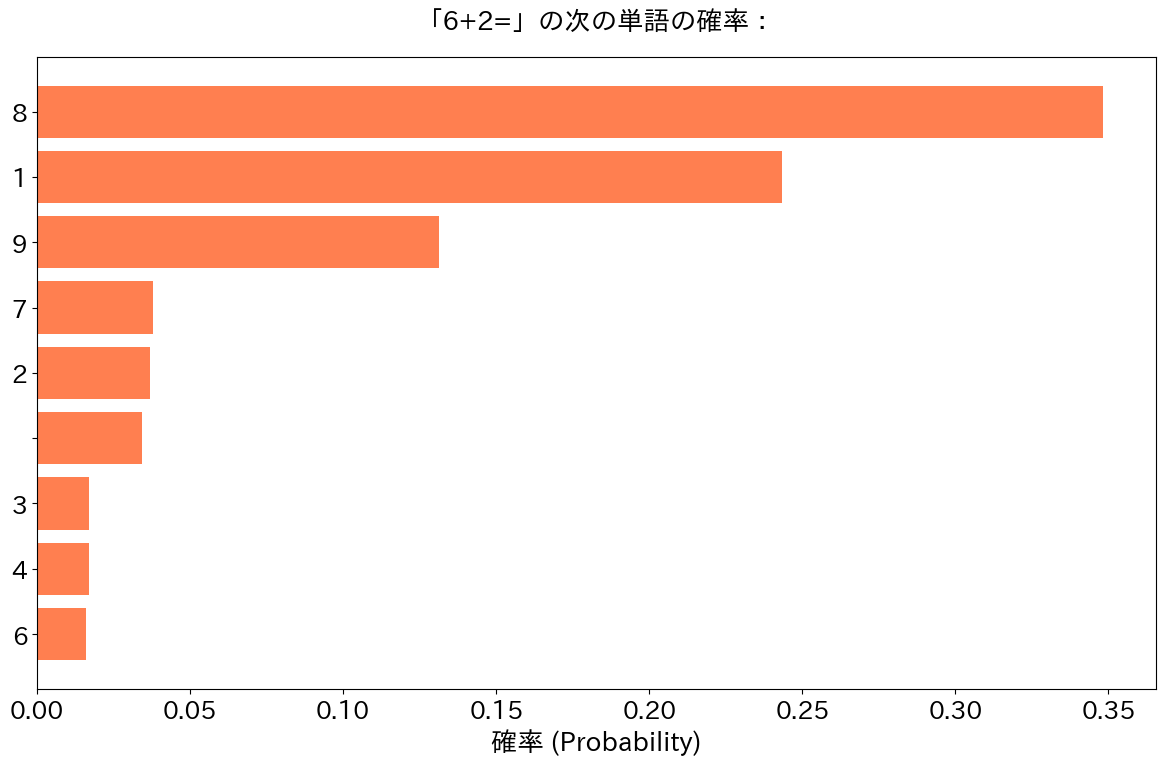

In [24]:
def visualize_next_token_distribution(probabilities, tokenizer, top_k=10, prompt=""):
    # --- Matplotlib Configuration for Larger Font ---
    # Set a larger default font size for all text elements in the plot
    plt.rcParams.update({'font.size': 18}) 

    # Convert to numpy array for easier sorting
    probs_np = probabilities.cpu().numpy()
    
    # Get the indices (token IDs) of the top_k probabilities, sorted descendingly
    top_k_indices = np.argsort(probs_np)[::-1][:top_k]
    
    # Get the actual tokens (strings) and their probability values
    top_k_tokens = [tokenizer.decode(idx).strip() for idx in top_k_indices] # .strip() cleans up spaces
    top_k_probs = probs_np[top_k_indices]

    # --- Create the Visualization (Adjusted Size) ---
    # Use a slightly larger height to accommodate the larger font without crowding
    plt.figure(figsize=(12, 8)) 
    
    # Create a horizontal bar chart
    plt.barh(top_k_tokens[::-1], top_k_probs[::-1], color='coral')
    
    # Set X-axis label with larger font
    plt.xlabel('確率 (Probability)', fontsize=19) 
    
    # Set title with larger font
    plt.title(f'「{prompt}」の次の単語の確率：', fontsize=19, pad=20) 
    
    plt.tight_layout()
    plt.savefig("../pics/next_token3.svg")
    plt.show() 

visualize_next_token_distribution(next_token_probs, tokenizer, top_k=10,prompt=prompt)


In [25]:
outputs.logits

tensor([[[-19.5887,   2.9616,  -2.1453,  ..., -19.5614, -19.7395, -19.5419],
         [-17.0000,   6.3658,  -0.4132,  ..., -17.0601, -17.1660, -16.9741],
         [-11.8816,   8.3447,  -2.6652,  ..., -11.9485, -12.0780, -11.8794],
         [-12.2678,   3.1310,  -1.8770,  ..., -12.3580, -12.4117, -12.2707],
         [-12.3196,   7.9137,  -0.9694,  ..., -12.3823, -12.4871, -12.3375]]])

In [26]:
# Load model directly
from transformers import AutoTokenizer, Gemma3ForCausalLM

tokenizer = AutoTokenizer.from_pretrained("google/gemma-3-1b-pt")
model = Gemma3ForCausalLM.from_pretrained("google/gemma-3-1b-pt")

emb_layer = model.get_input_embeddings()

In [27]:
import torch
# 1. プロンプト
prompt = "6+2="

# 2. プロンプトをトークン化、ここのinput_idsは整数のリストです
input_ids = tokenizer(prompt, return_tensors="pt").input_ids

# 3. モデルに適用する
with torch.no_grad(): 
    outputs = model(input_ids)

# 4. 最後の出力を抽出する
next_token_logits = outputs.logits[0, -1, :]

# 5. 確率を算出する
next_token_probs = torch.softmax(next_token_logits, dim=-1)

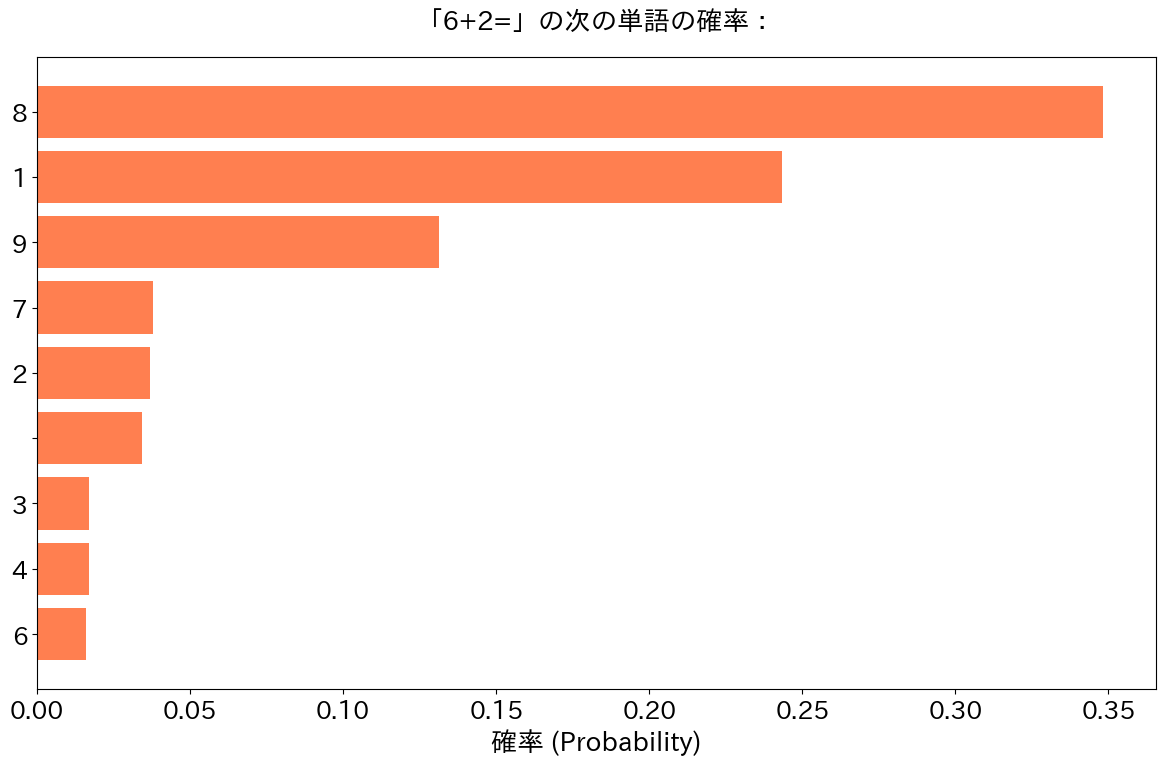

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib


def visualize_next_token_distribution(probabilities, tokenizer, top_k=10, prompt="",file_name = "next_token3.svg"):
    # --- Matplotlib Configuration for Larger Font ---
    # Set a larger default font size for all text elements in the plot
    plt.rcParams.update({'font.size': 18}) 

    # Convert to numpy array for easier sorting
    probs_np = probabilities.cpu().numpy()
    
    # Get the indices (token IDs) of the top_k probabilities, sorted descendingly
    top_k_indices = np.argsort(probs_np)[::-1][:top_k]
    
    # Get the actual tokens (strings) and their probability values
    top_k_tokens = [tokenizer.decode(idx).strip() for idx in top_k_indices] # .strip() cleans up spaces
    top_k_probs = probs_np[top_k_indices]

    # --- Create the Visualization (Adjusted Size) ---
    # Use a slightly larger height to accommodate the larger font without crowding
    plt.figure(figsize=(12, 8)) 
    
    # Create a horizontal bar chart
    plt.barh(top_k_tokens[::-1], top_k_probs[::-1], color='coral')
    
    # Set X-axis label with larger font
    plt.xlabel('確率 (Probability)', fontsize=19) 
    
    # Set title with larger font
    plt.title(f'「{prompt}」の次の単語の確率：', fontsize=19, pad=20) 
    
    plt.tight_layout()
    plt.savefig(f"../pics/{file_name}")
    plt.show() 

visualize_next_token_distribution(next_token_probs, tokenizer, top_k=10,prompt=prompt)

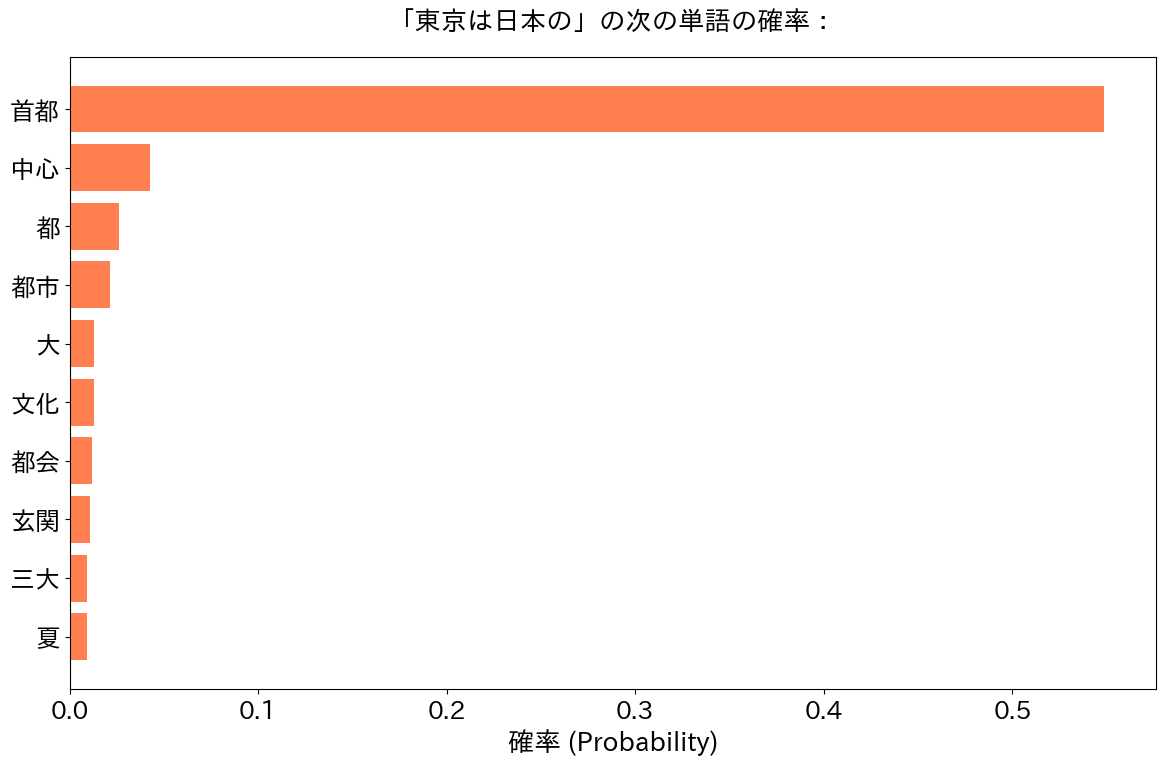

In [29]:
#　huggingface からモデルを引っ張て使います
from transformers import AutoTokenizer, AutoModelForCausalLM

# 使うモデルを　google/gemma-3-1b-pt　に指定
ckpt = "google/gemma-3-1b-pt"
tokenizer = AutoTokenizer.from_pretrained(ckpt)
model = AutoModelForCausalLM.from_pretrained(ckpt)

# 1. プロンプト
prompt = "東京は日本の"

# 2. プロンプトをトークン化、ここのinput_idsは整数のリストです
input_ids = tokenizer(prompt, return_tensors="pt").input_ids

# 3. モデルに適用する
with torch.no_grad(): 
    outputs = model(input_ids)

# 4. 最後の出力を抽出する
next_token_logits = outputs.logits[0, -1, :]

# 5. 確率を計算する
next_token_probs = torch.softmax(next_token_logits, dim=-1)

# 6. 図として、出力
visualize_next_token_distribution(next_token_probs, tokenizer, top_k=10, prompt=prompt)

In [30]:
from transformers import LogitsProcessor
import torch


class SecondLargestLogitsProcessor(LogitsProcessor):
    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor):
        top2 = torch.topk(scores, k=2, dim=-1)

        # top2.values[:, 0] -> largest
        # top2.values[:, 1] -> second largest
        # top2.indices[:, 1] -> index of second largest logit

        # Create all -inf
        new_scores = torch.full_like(scores, float("-inf"))

        # Set only the 2nd-largest index to 0 so argmax picks it
        second_idx = top2.indices[:, 1]
        new_scores[torch.arange(scores.size(0)), second_idx] = 0.0

        return new_scores


prompt = "東京は日本の"
processor = SecondLargestLogitsProcessor()
max_new_token = 18
for i in range(max_new_token):
    model_inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    input_len = model_inputs["input_ids"].shape[-1]

    with torch.inference_mode():
        generation = model.generate(
            **model_inputs,
            max_new_tokens=1, 
            logits_processor=[processor]
            )
        generation = generation[0][input_len:]

    decoded = tokenizer.decode(generation, skip_special_tokens=True)
    
    prompt += decoded
print(prompt)

東京は日本の中心地として発展し続けてきた。東京の歴史を振り返ってみよう！
 


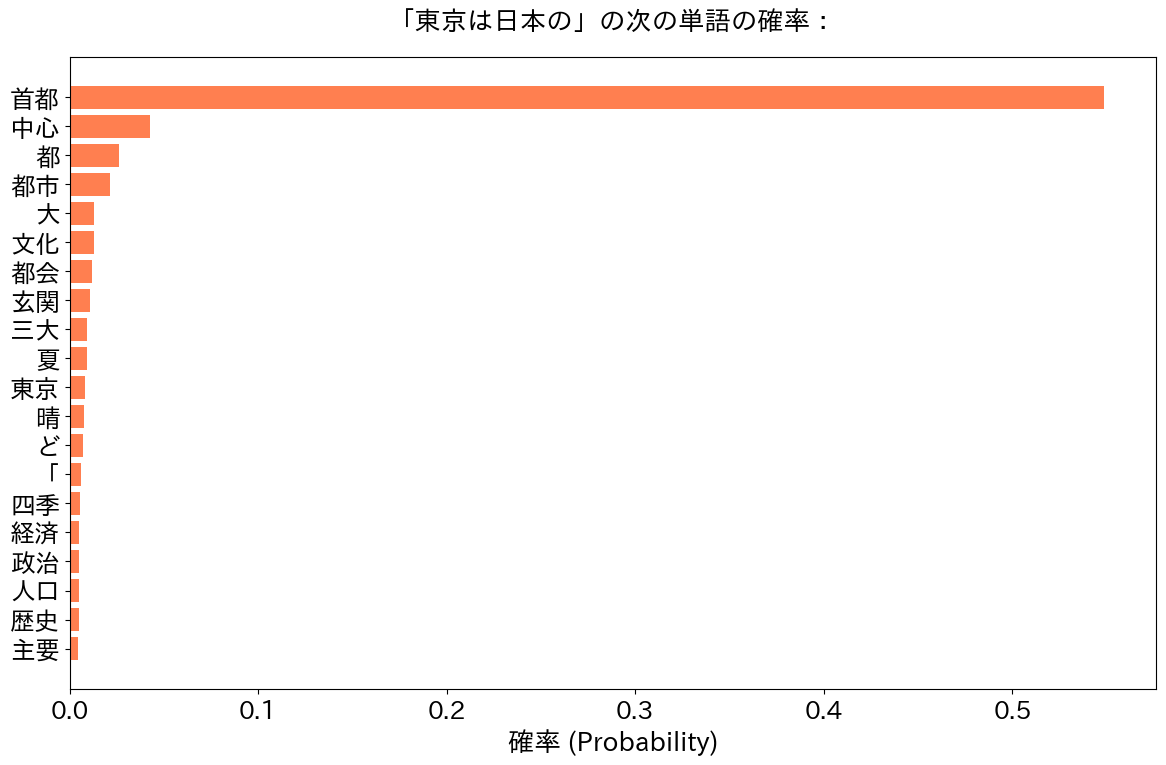

In [31]:
import torch
# 1. プロンプト
prompt = "東京は日本の"

# 2. プロンプトをトークン化、ここのinput_idsは整数のリストです
input_ids = tokenizer(prompt, return_tensors="pt").input_ids

# 3. モデルに適用する
with torch.no_grad(): 
    outputs = model(input_ids)

# 4. 最後の出力を抽出する
next_token_logits = outputs.logits[0, -1, :]

# 5. 確率を計算する
next_token_probs = torch.softmax(next_token_logits, dim=-1)

# 6. 図として、出力
visualize_next_token_distribution(next_token_probs, tokenizer, top_k=20, prompt=prompt, file_name="next_token15")

In [32]:
def softmax(x):
    y = np.exp(x)
    return y / np.sum(np.exp(x))

def visualize_next_token_distribution2(probabilities, tokenizer, top_k=10, prompt="", file_name="next_token3.svg"):
    import matplotlib.pyplot as plt
    import numpy as np

    plt.rcParams.update({'font.size': 18})

    probs_np = probabilities.cpu().numpy()

    # -----------------------------
    # Top-k extraction
    # -----------------------------
    top_k_indices = np.argsort(probs_np)[::-1][:top_k]
    top_k_tokens = [tokenizer.decode(i).strip() for i in top_k_indices]
    top_k_probs = probs_np[top_k_indices]
    top_k_probs_softmax = softmax(top_k_probs)
    print(top_k_probs_softmax)
    # -----------------------------
    # Visualization: two bars
    # -----------------------------
    plt.figure(figsize=(14, 6))

    # number of bars
    y_pos = np.arange(top_k)

    # Plot raw top-k probabilities
    plt.barh(
        y_pos + 0.15,         # shift down
        top_k_probs[::-1],    # reverse so highest is bottom
        height=0.3,
        label="出力されたままの確率",
    )

    # Plot normalized top-k softmax probabilities
    plt.barh(
        y_pos - 0.15,         # shift up
        top_k_probs_softmax[::-1],
        height=0.3,
        label="Top-k Softmax の確率",
    )

    # y-axis labels (tokens)
    plt.yticks(y_pos, top_k_tokens[::-1])

    plt.xlabel("Probability", fontsize=19)
    plt.title(f'「{prompt}」Next Token Probability Distribution', fontsize=19, pad=20)

    plt.legend(fontsize=16)
    plt.tight_layout()

    plt.savefig(f"../pics/{file_name}")
    plt.show()


[0.15897429 0.09580272 0.09426849 0.09382667 0.09302779 0.09300917
 0.09292152 0.09280257 0.0926962  0.09267049]


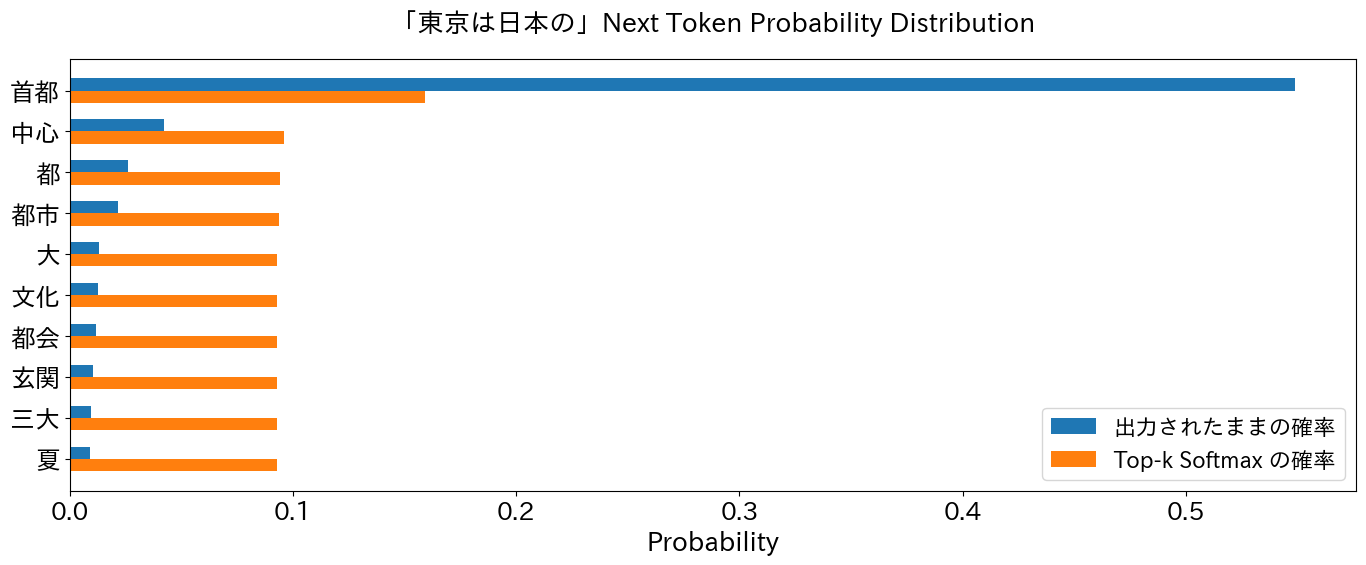

In [33]:

# 6. 図として、出力
visualize_next_token_distribution2(next_token_probs, tokenizer, top_k=10, prompt=prompt, file_name="next_token6")

In [41]:
def softmax(x):
    y = np.exp(x - np.max(x))
    return y / np.sum(y)

def visualize_multi_temperature_curve(probabilities, tokenizer, 
                                      top_k=10, 
                                      temperatures=[0.5, 1, 5, 100],
                                      prompt="", file_name="temp_curve.svg"):

    plt.rcParams.update({'font.size': 16})

    probs_np = probabilities.cpu().numpy()

    # -------------------------------------
    # Top-k tokens
    # -------------------------------------
    top_k_indices = np.argsort(probs_np)[::-1][:top_k]
    top_k_tokens = [tokenizer.decode(i).strip() for i in top_k_indices]
    top_k_probs = probs_np[top_k_indices]  # raw probabilities

    # Use integer x positions
    x = np.arange(top_k)

    # -------------------------------------
    # Compute scaled probabilities for each T
    # -------------------------------------
    temp_results = {}
    for T in temperatures:
        logits = np.log(top_k_probs + 1e-40)
        logits_T = logits / T
        probs_T = softmax(logits_T)
        temp_results[T] = probs_T

    # -------------------------------------
    # Plotting (curves)
    # -------------------------------------
    plt.figure(figsize=(14, 6))

    # Raw curve
    plt.plot(x, top_k_probs, marker='o', linewidth=3, label="Raw Probabilities")

    # Temperature curves
    for T in temperatures:
        plt.plot(
            x,
            temp_results[T],
            marker='o',
            linewidth=2,
            label=f"T = {T}"
        )

    plt.xticks(x, top_k_tokens, rotation=45, ha='right')
    plt.ylabel("確率")
    plt.xlabel("Token")
    plt.title(f"Temperature Effects on Next-Token Distribution (Curve)\nPrompt: 「{prompt}」", fontsize=20)
    plt.legend(fontsize=14)

    plt.tight_layout()
    plt.savefig(f"../pics/{file_name}")
    plt.show()


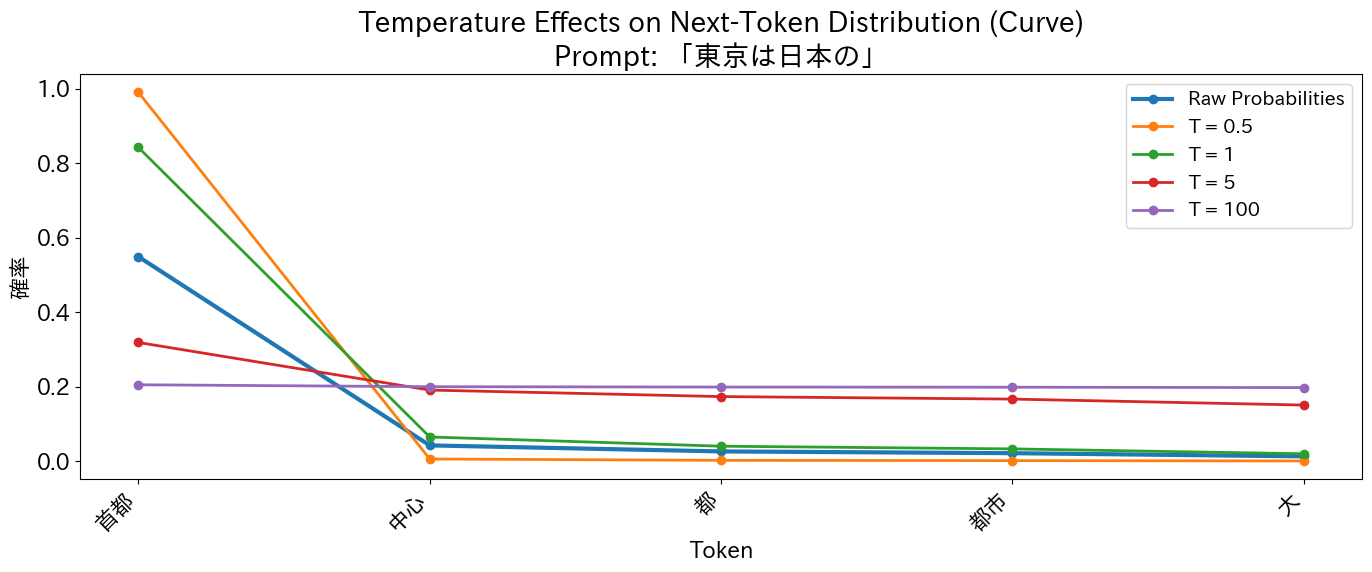

In [42]:


visualize_multi_temperature_curve(next_token_probs, tokenizer,top_k=5,prompt=prompt)

In [50]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("google/gemma-3-1b-it")
model = AutoModelForCausalLM.from_pretrained("google/gemma-3-1b-it")


In [88]:

PROMPT = """
Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Create a function to calculate the sum of a sequence of integers.

### Input:
[1, 2, 3, 4, 5]
"""

messages = [
    {"role": "user", "content": PROMPT},
]
inputs = tokenizer.apply_chat_template(
	messages,
	add_generation_prompt=True,
	tokenize=False,
	return_tensors="pt",
)
print(inputs)

<bos><start_of_turn>user
Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Create a function to calculate the sum of a sequence of integers.

### Input:
[1, 2, 3, 4, 5]<end_of_turn>
<start_of_turn>model



In [93]:
input_tokens = tokenizer.encode(inputs, return_tensors="pt")
outputs = model.generate(input_tokens, max_new_tokens=128, temperature = 0.01)
print(tokenizer.decode(outputs[-1]))

<bos><bos><start_of_turn>user
Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Create a function to calculate the sum of a sequence of integers.

### Input:
[1, 2, 3, 4, 5]<end_of_turn>
<start_of_turn>model
```python
def sum_sequence(sequence):
  """
  Calculates the sum of a sequence of integers.

  Args:
    sequence: A list of integers.

  Returns:
    The sum of the integers in the sequence.
  """
  total = 0
  for number in sequence:
    total += number
  return total

# Example usage:
sequence = [1, 2, 3, 4, 5]
result = sum_sequence(sequence)
print(result)  # Output: 15
```<end_of_turn>


In [94]:
max_new_token = 128

prompt = inputs

input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)

for _ in range(max_new_token):
    with torch.inference_mode():
        outputs = model(input_ids)
        next_token_logits = outputs.logits[:, -1, :]   # shape: [1, vocab]
        
        next_token_id = torch.argmax(next_token_logits, dim=-1).unsqueeze(-1)

    # 2. Append new token (no decoding)
    input_ids = torch.cat([input_ids, next_token_id], dim=-1)

outputs = tokenizer.decode(input_ids[0], skip_special_tokens=True)
print(outputs)


user
Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Create a function to calculate the sum of a sequence of integers.

### Input:
[1, 2, 3, 4, 5]
model
```python
def sum_sequence(sequence):
  """
  Calculates the sum of a sequence of integers.

  Args:
    sequence: A list of integers.

  Returns:
    The sum of the integers in the sequence.
  """
  total = 0
  for number in sequence:
    total += number
  return total

# Example usage:
sequence = [1, 2, 3, 4, 5]
result = sum_sequence(sequence)
print(result)  # Output: 15
``` प्रकारे


In [95]:

outputs = tokenizer.decode(input_ids[0])
print(outputs)

<bos><bos><start_of_turn>user
Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Create a function to calculate the sum of a sequence of integers.

### Input:
[1, 2, 3, 4, 5]<end_of_turn>
<start_of_turn>model
```python
def sum_sequence(sequence):
  """
  Calculates the sum of a sequence of integers.

  Args:
    sequence: A list of integers.

  Returns:
    The sum of the integers in the sequence.
  """
  total = 0
  for number in sequence:
    total += number
  return total

# Example usage:
sequence = [1, 2, 3, 4, 5]
result = sum_sequence(sequence)
print(result)  # Output: 15
```<end_of_turn><end_of_turn><end_of_turn> प्रकारे
